In [79]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import seaborn as sns 


In [80]:
df = pd.read_csv('cat_vs_dog_randomData.csv', index_col=0)

In [81]:
df.head()

,Height,Weight,Fur_Intensity,Tail_Length,Energy_Level,Ear_Size,Paw_Size,Interaction_Term,Label
0,0.52,3.48,0.34,0.71,0.61,0.41,0.21,0.24,0
1,0.87,6.34,0.32,0.82,0.82,0.48,0.56,0.26,1
2,0.74,8.98,0.92,0.33,0.78,0.78,0.71,0.30,1
3,0.66,7.86,0.32,0.66,0.24,0.37,0.55,0.21,1
4,0.39,8.45,0.34,0.61,0.23,0.80,0.34,0.21,1


In [82]:
df.describe()

,Height,Weight,Fur_Intensity,Tail_Length,Energy_Level,Ear_Size,Paw_Size,Interaction_Term,Label
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,0.594090,6.056320,0.55217,0.541410,0.544720,0.49879,0.385680,0.297940,0.50000
std,0.175355,2.337337,0.26164,0.257696,0.258206,0.23139,0.182595,0.212104,0.50025
min,0.300000,2.030000,0.10000,0.100000,0.100000,0.10000,0.070000,0.020000,0.00000
25%,0.440000,3.930000,0.33750,0.320000,0.320000,0.30000,0.240000,0.120000,0.00000
50%,0.600000,6.150000,0.55000,0.540000,0.545000,0.49000,0.360000,0.240000,0.50000
75%,0.750000,8.082500,0.78000,0.760000,0.770000,0.69000,0.510000,0.430000,1.00000
max,0.900000,10.000000,1.00000,1.000000,1.000000,0.90000,0.920000,0.980000,1.00000


In [83]:
df.isnull().sum()

Height              0
Weight              0
Fur_Intensity       0
Tail_Length         0
Energy_Level        0
Ear_Size            0
Paw_Size            0
Interaction_Term    0
Label               0
dtype: int64

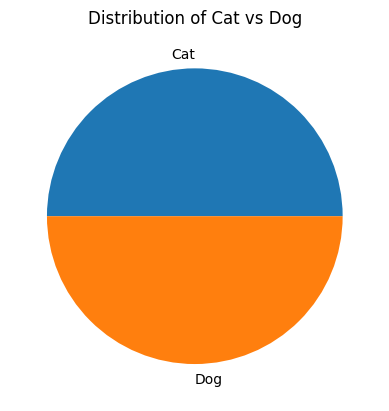

In [84]:
label_count = df['Label'].value_counts()
plt.pie(label_count, labels=['Cat', 'Dog'])
plt.title("Distribution of Cat vs Dog")
plt.show()

<Axes: xlabel='Height', ylabel='Label'>

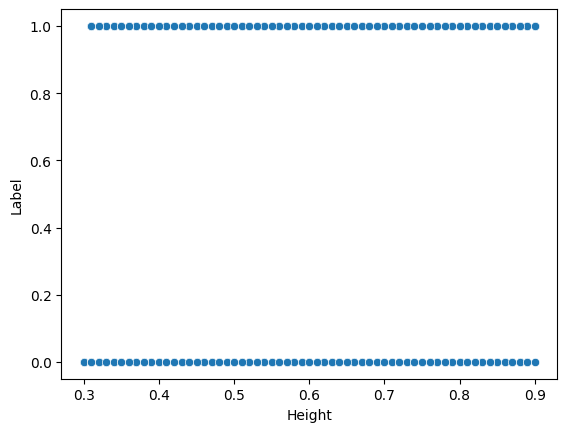

In [85]:
sns.scatterplot(x='Height', y='Label', data=df)

In [86]:
X = df.drop(columns='Label')
y = df['Label']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [89]:
y_pred = model.predict(X_test)

In [90]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.97
Precision: 0.98
Recall: 0.96
F1 Score: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       106
           1       0.98      0.96      0.97        94

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



In [91]:
cm = confusion_matrix(y_test, y_pred)

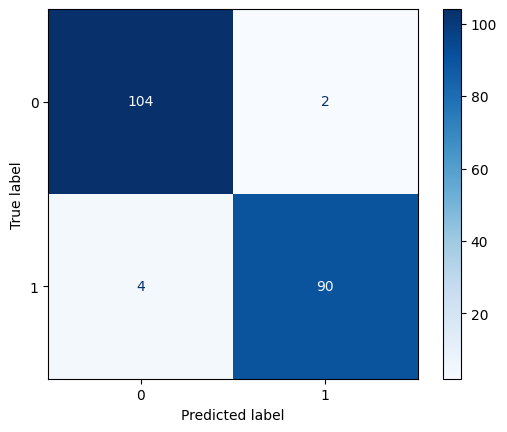

In [92]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [93]:
import joblib

joblib.dump(model, 'cat_vs_dog_model.pkl')

['cat_vs_dog_model.pkl']